In [1]:
%load_ext blackcellmagic

# IV. SCORCHER: SINGAPORE BAKED UNDER ONE OF THE WARMEST QUARTER EVER ON RECORD AS GLOBAL TEMPERATURES ROSE

In August, [news emerged that yet another global temperature record had fallen](https://www.nytimes.com/2019/08/15/climate/hottest-july-noaa.html) - July 2019 was the hottest month on record, beating the previous record held by July 2016. Scientists confirmed that the global average temperature in July was about [0.04 degrees Celsius warmer than the same month in 2016](https://www.bbc.com/news/science-environment-49238745).

While the increment might seem marginal, it came on the back of a similar global record for June 2019 and [new all-time temperature highs set in many countries over the summer](https://www.bbc.com/news/science-environment-49753680).

In Singapore, the Meteorological Service said that [August 2019 was likely the driest and warmest August since records started in 1929](https://www.channelnewsasia.com/news/singapore/august-2019-singapore-weather-driest-warmest-met-service-11858082).

The heat wave in Singapore certainly felt like it started well before August. And it certainly did not end that month. This notebook examines temperature records for the third quarter of 2019 - July, August and September - to see how it compares with long term data.

It should be pointed out at the outset that comparisons of weather records are always tricky, even for a small city-state like Singapore. Much depends on the data you are using, and the benchmarks and metrics for comparison.

This project uses a 36-year weather dataset that I had previously compiled from the Singapore [Met Service's website](http://www.weather.gov.sg/climate-historical-daily), from 1983 to 2019. The data was pre-processed in an [earlier notebook](https://github.com/chuachinhon/weather_singapore_cch/blob/master/notebooks/1.0_data_cleaning_cch.ipynb), which I have updated with July-Sept 2019 data.

In [2]:
import joypy
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from decimal import Decimal
from matplotlib import cm

mpl.rcParams["figure.dpi"] = 300
mpl.rcParams['xtick.labelsize']=14
mpl.rcParams['ytick.labelsize']=14
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [3]:
# The CSV file was pre-processed in notebook 1.0

weather = pd.read_csv('../data/weather.csv') # this dataset is from 1983 to Sept 2019
weather = weather.sort_values('Date', ascending=True)

In [4]:
# Setting filter criteria for comparing Q3 2019 with Q3s of 1983-2018

crit1= weather['Year'] ==2019
crit2= weather['Year'] !=2019
crit3= weather['Month'] == 7
crit4= weather['Month'] == 8
crit5= weather['Month'] == 9

In [5]:
#Q3 weather data for years 2019
weather_q32019 = weather[crit1 & (crit3 | crit4 | crit5)]

#Q3 weather data for years 1983 - 2018
historic_q3 = weather[crit2 & (crit3 | crit4 | crit5)]

In [6]:
weather_q32019.shape, historic_q3.shape

((92, 12), (3312, 12))

In [7]:
weather_q32019.head()

,Date,Year,Month,Month_Name,Quarter,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
91,2019-07-01,2019,7,July,3,1,0.0,29.4,32.1,27.7,14.8,36.0
90,2019-07-02,2019,7,July,3,2,0.0,29.7,32.3,27.9,13.0,33.8
89,2019-07-03,2019,7,July,3,3,0.2,28.7,31.0,26.9,9.7,28.4
88,2019-07-04,2019,7,July,3,4,0.0,29.3,32.3,27.3,11.2,27.7
87,2019-07-05,2019,7,July,3,5,0.0,29.5,32.8,27.8,15.5,42.5


In [8]:
historic_q3.head()

,Date,Year,Month,Month_Name,Quarter,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
13240,1983-07-01,1983,7,July,3,1,8.7,27.5,33.0,24.4,3.7,28.8
13239,1983-07-02,1983,7,July,3,2,0.0,28.7,32.6,25.5,10.5,38.2
13238,1983-07-03,1983,7,July,3,3,5.3,27.9,32.0,24.4,5.8,44.6
13237,1983-07-04,1983,7,July,3,4,6.2,28.0,31.9,25.7,7.6,51.8
13236,1983-07-05,1983,7,July,3,5,39.5,25.4,27.4,21.4,3.6,36.0


In [9]:
weather.tail()

,Date,Year,Month,Month_Name,Quarter,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
4,2019-09-26,2019,9,September,3,26,0.0,28.5,33.5,25.4,9.0,31.0
3,2019-09-27,2019,9,September,3,27,0.0,29.2,34.1,26.8,9.7,30.6
2,2019-09-28,2019,9,September,3,28,0.0,28.9,34.3,26.0,7.6,29.5
1,2019-09-29,2019,9,September,3,29,0.0,28.4,33.3,26.5,6.8,41.4
0,2019-09-30,2019,9,September,3,30,1.4,27.5,31.3,25.1,6.8,34.2


# 1. DATA EXPLORATION

## 1.1 TEMPERATURE RECORDS BETWEEN 1983 AND SEPT 2019

In [10]:
print(
    "Highest maximum daily temperature between 1983 and Sept 2019:",
    weather["Maximum Temperature (°C)"].max(),"°C"
)

print(
    "Average maximum daily temperature between 1983 and Sept 2019:",
    weather["Maximum Temperature (°C)"].mean(),"°C"
)

print(
    "Highest average daily temperature between 1983 and Sept 2019:",
    weather["Mean Temperature (°C)"].max(),"°C"
)

print(
    "Average daily temperature recorded 1983 and Sept 2019:",
    weather["Mean Temperature (°C)"].mean(),"°C"
)

print(
    "Average minimum daily temperature recorded 1983 and Sept 2019:",
    weather["Minimum Temperature (°C)"].mean(),"°C"
)

Highest maximum daily temperature between 1983 and Sept 2019: 36.0 °C
Average maximum daily temperature between 1983 and Sept 2019: 31.518246163016126 °C
Highest average daily temperature between 1983 and Sept 2019: 30.9 °C
Average daily temperature recorded 1983 and Sept 2019: 27.66715094620773 °C
Average minimum daily temperature recorded 1983 and Sept 2019: 24.902637460885227 °C


The highest maximum daily temperature in the last 36 years - 36°C - was recorded on March 26 1998.

Two days in May 1998 - May 21 and May 28 - jointly hold the record for the highest mean daily temperature of 30.9°C - 3.23°C above the average daily temperature for that period.

Let's see how the temperature records for July-September compare against these records.

## 1.2 TEMPERATURE TRENDS FOR JULY - SEPT 2019 

In [11]:
print(
    "Highest maximum daily temperature between July and September 2019:",
    weather_q32019["Maximum Temperature (°C)"].max(),"°C"
)

print(
    "Average maximum daily temperature between July and September 2019:",
    weather_q32019["Maximum Temperature (°C)"].mean(),"°C"
)

print(
    "Highest average daily temperature between July and September 2019:",
    weather_q32019["Mean Temperature (°C)"].max(),"°C"
)

print(
    "Average daily temperature between July and September 2019:",
    weather_q32019["Mean Temperature (°C)"].mean(),"°C"
)

print(
    "Average minimum daily temperature between July and September 2019:",
    weather_q32019["Minimum Temperature (°C)"].mean(),"°C"
)

Highest maximum daily temperature between July and September 2019: 34.3 °C
Average maximum daily temperature between July and September 2019: 32.592391304347835 °C
Highest average daily temperature between July and September 2019: 29.8 °C
Average daily temperature between July and September 2019: 29.061956521739145 °C
Average minimum daily temperature between July and September 2019: 26.868478260869576 °C


In [12]:
weather_q32019[weather_q32019["Mean Temperature (°C)"] == 29.8]

,Date,Year,Month,Month_Name,Quarter,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
49,2019-08-12,2019,8,August,3,12,0.0,29.8,33.2,27.8,16.2,37.1
45,2019-08-16,2019,8,August,3,16,0.0,29.8,33.2,27.7,15.5,36.4


The temperature records for July - September 2019 did not shatter any single-day records in my dataset. The hottest day in this period was September 28, when the maximum daily temperature hit 34.3°C - well short of the all-time high of 36°C.

The highest average daily temperature for this quarter - 29.8 °C (recorded on both August 12 and August 16 2019) - was also below the historical record of 30.9°C.

But if you look closer, while the data in this period did not break any single-day records, the mean temperatures for July-September 2019 were all higher than the long term averages.

The average maximum daily temperature for July-September 2019 was 32.59°C, 1.07°C higher than the long term average recorded between 1983 and 2019 of 31.52°C.

Likewise, the average daily temperatures and average minimum daily temperatures in Q3 2019 were both higher than the long term average by 1.39°C and 1.97°C respectively.

This gives us a clue as to how to frame the comparison, ie, not by looking at single-day records but by comparing long term averages. But first, let's make sure we also compare apples with apples in this case, that is, compare third-quarter temperature records with each other instead of the overall long term averages which contain cooler months.

## 1.3 TEMPERATURE TRENDS FOR JULY - SEPT BETWEEN 1983 AND 2018

In [13]:
print(
    "Highest maximum daily temperature between July and September; 1983-2018:",
    historic_q3["Maximum Temperature (°C)"].max(),"°C"
)

print(
    "Average maximum daily temperature between July and September; 1983-2018:",
    historic_q3["Maximum Temperature (°C)"].mean(),"°C"
)

print(
    "Highest average daily temperature between July and September; 1983-2018:",
    historic_q3["Mean Temperature (°C)"].max(),"°C"
)

print(
    "Average daily temperature between July and September; 1983-2018:",
    historic_q3["Mean Temperature (°C)"].mean(),"°C"
)

print(
    "Average minimum daily temperature between July and September; 1983-2018:",
    historic_q3["Minimum Temperature (°C)"].mean(),"°C"
)

Highest maximum daily temperature between July and September; 1983-2018: 34.4 °C
Average maximum daily temperature between July and September; 1983-2018: 31.38916062801922 °C
Highest average daily temperature between July and September; 1983-2018: 30.2 °C
Average daily temperature between July and September; 1983-2018: 27.923973429951694 °C
Average minimum daily temperature between July and September; 1983-2018: 25.119323671497536 °C


This confirms my intuition in the earlier section. Weather records in Q3 2019, when compared to records in a similar period between 1983 and 2018, didn't break any single-day records for highest maximum daily temperatures or highest mean daily temperatures.

But the average temperatures for Q3 2019, be it in the categories of maximum daily, mean daily or minimum daily temperatures, were all higher than the long term averages for 1983-2018.

### The best way to take in all this is via some charts.

# 2. VISUALISATION

## 2.1 COMPARING Q3 2019 WITH HISTORIC Q3 WEATHER DATA

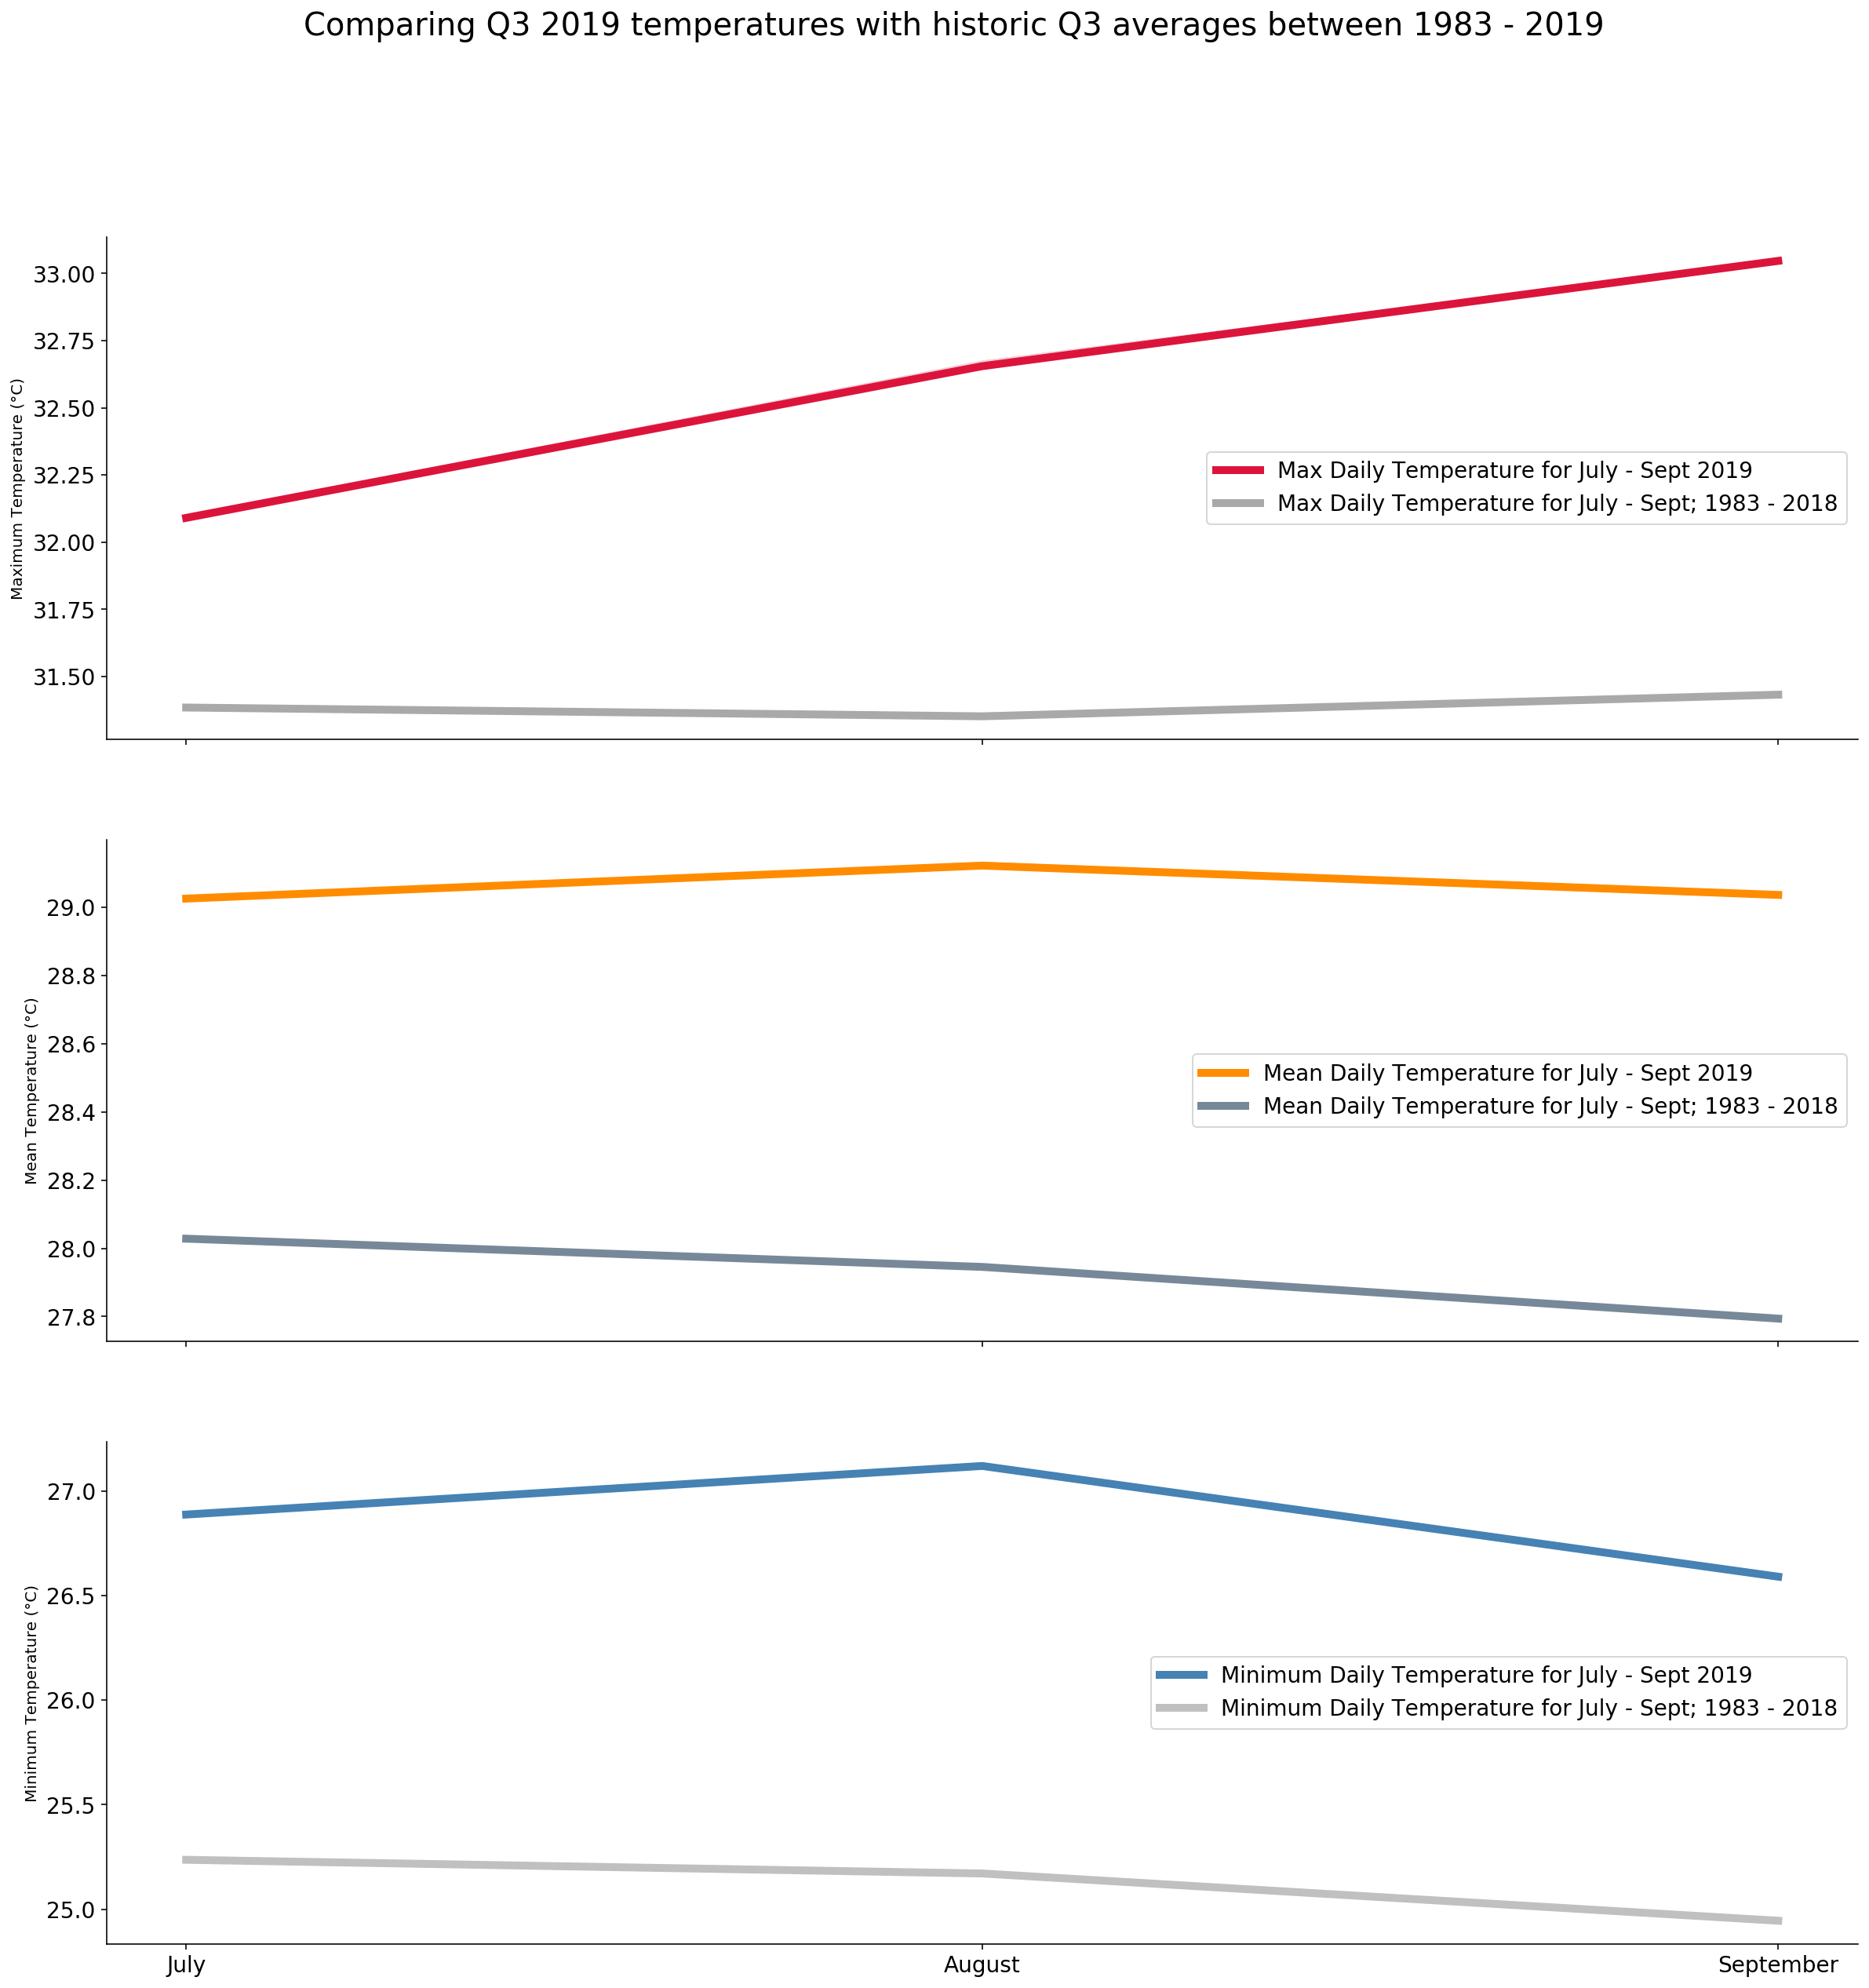

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(20, 20), sharex=True)
sns.lineplot(
    x="Month_Name",
    y="Maximum Temperature (°C)",
    linewidth=5,
    data=weather_q32019,
    label="Max Daily Temperature for July - Sept 2019",
    color="crimson",
    ci=False,
    sort=False,
    ax=axs[0],
)
sns.lineplot(
    x="Month_Name",
    y="Maximum Temperature (°C)",
    linewidth=5,
    data=historic_q3,
    label="Max Daily Temperature for July - Sept; 1983 - 2018",
    color="darkgrey",
    ci=False,
    sort=False,
    ax=axs[0],
)


sns.lineplot(
    x="Month_Name",
    y="Mean Temperature (°C)",
    linewidth=5,
    data=weather_q32019,
    label="Mean Daily Temperature for July - Sept 2019",
    color="darkorange",
    ci=False,
    sort=False,
    ax=axs[1],
)
sns.lineplot(
    x="Month_Name",
    y="Mean Temperature (°C)",
    linewidth=5,
    data=historic_q3,
    label="Mean Daily Temperature for July - Sept; 1983 - 2018",
    color="lightslategrey",
    ci=False,
    sort=False,
    ax=axs[1],
)


sns.lineplot(
    x="Month_Name",
    y="Minimum Temperature (°C)",
    linewidth=5,
    data=weather_q32019,
    label="Minimum Daily Temperature for July - Sept 2019",
    color="steelblue",
    ci=False,
    sort=False,
    ax=axs[2],
)
sns.lineplot(
    x="Month_Name",
    y="Minimum Temperature (°C)",
    linewidth=5,
    data=historic_q3,
    label="Minimum Daily Temperature for July - Sept; 1983 - 2018",
    color="silver",
    ci=False,
    sort=False,
    ax=axs[2])

fig.suptitle("Comparing Q3 2019 temperatures with historic Q3 averages between 1983 - 2019", fontsize=20)

for ax in axs:
    ax.legend(fontsize=14, loc=7)

sns.despine()
plt.xlabel("")
plt.show()

The comparison is striking, to say the least. The average temperatures for Q3 2019 are markedly higher across all three categories, meaning we are getting hotter days as well as warmer nights.

The mean and minimum daily temperatures dip as we move from July to September, as expected. But the maximum daily temperature in Q3 2019 instead spiked as the months progressed, showing a rising trend on average from July through to September. Would the rising trend for maximum daily temperatures start to dip in October. Let's hope so! 

Note: By default, seaborn lineplot aggregates over multiple y values at each value of x and shows an estimate of the central tendency and a confidence interval for that estimate - https://seaborn.pydata.org/generated/seaborn.lineplot.html

## 2.2 COMPARING Q3 2019 WITH Q3 2016 & Q3 1997

We can also do single-year comparisons. I've picked the Q3s of 2016 and 1997 as both years experienced extensive heat spells.

Singapore's Met Service had said [2016 was the hottest year on record for the city-state](https://www.straitstimes.com/singapore/environment/2016-is-hottest-year-on-record-for-singapore-and-the-world).  

In 1997, Singapore, like much of the world then, suffered long periods of intensely hot and dry weather as a result of the El Nino.

In [15]:
# New filtering criteria for 1997 and 2016 Q3 data
crit6 = weather['Year'] == 1997
crit7 = weather['Year'] == 2016

# New dataframes for Q3 2019 with Q3 1997, Q3 2016
weather_q31997 = weather[crit6 & (crit3 | crit4 | crit5)]

weather_q32016 = weather[crit7 & (crit3 | crit4 | crit5)]


In [16]:
weather_q31997.shape, weather_q32016.shape

((92, 12), (92, 12))

In [17]:
q3_combo = pd.concat([weather_q32019, weather_q32016, weather_q31997])

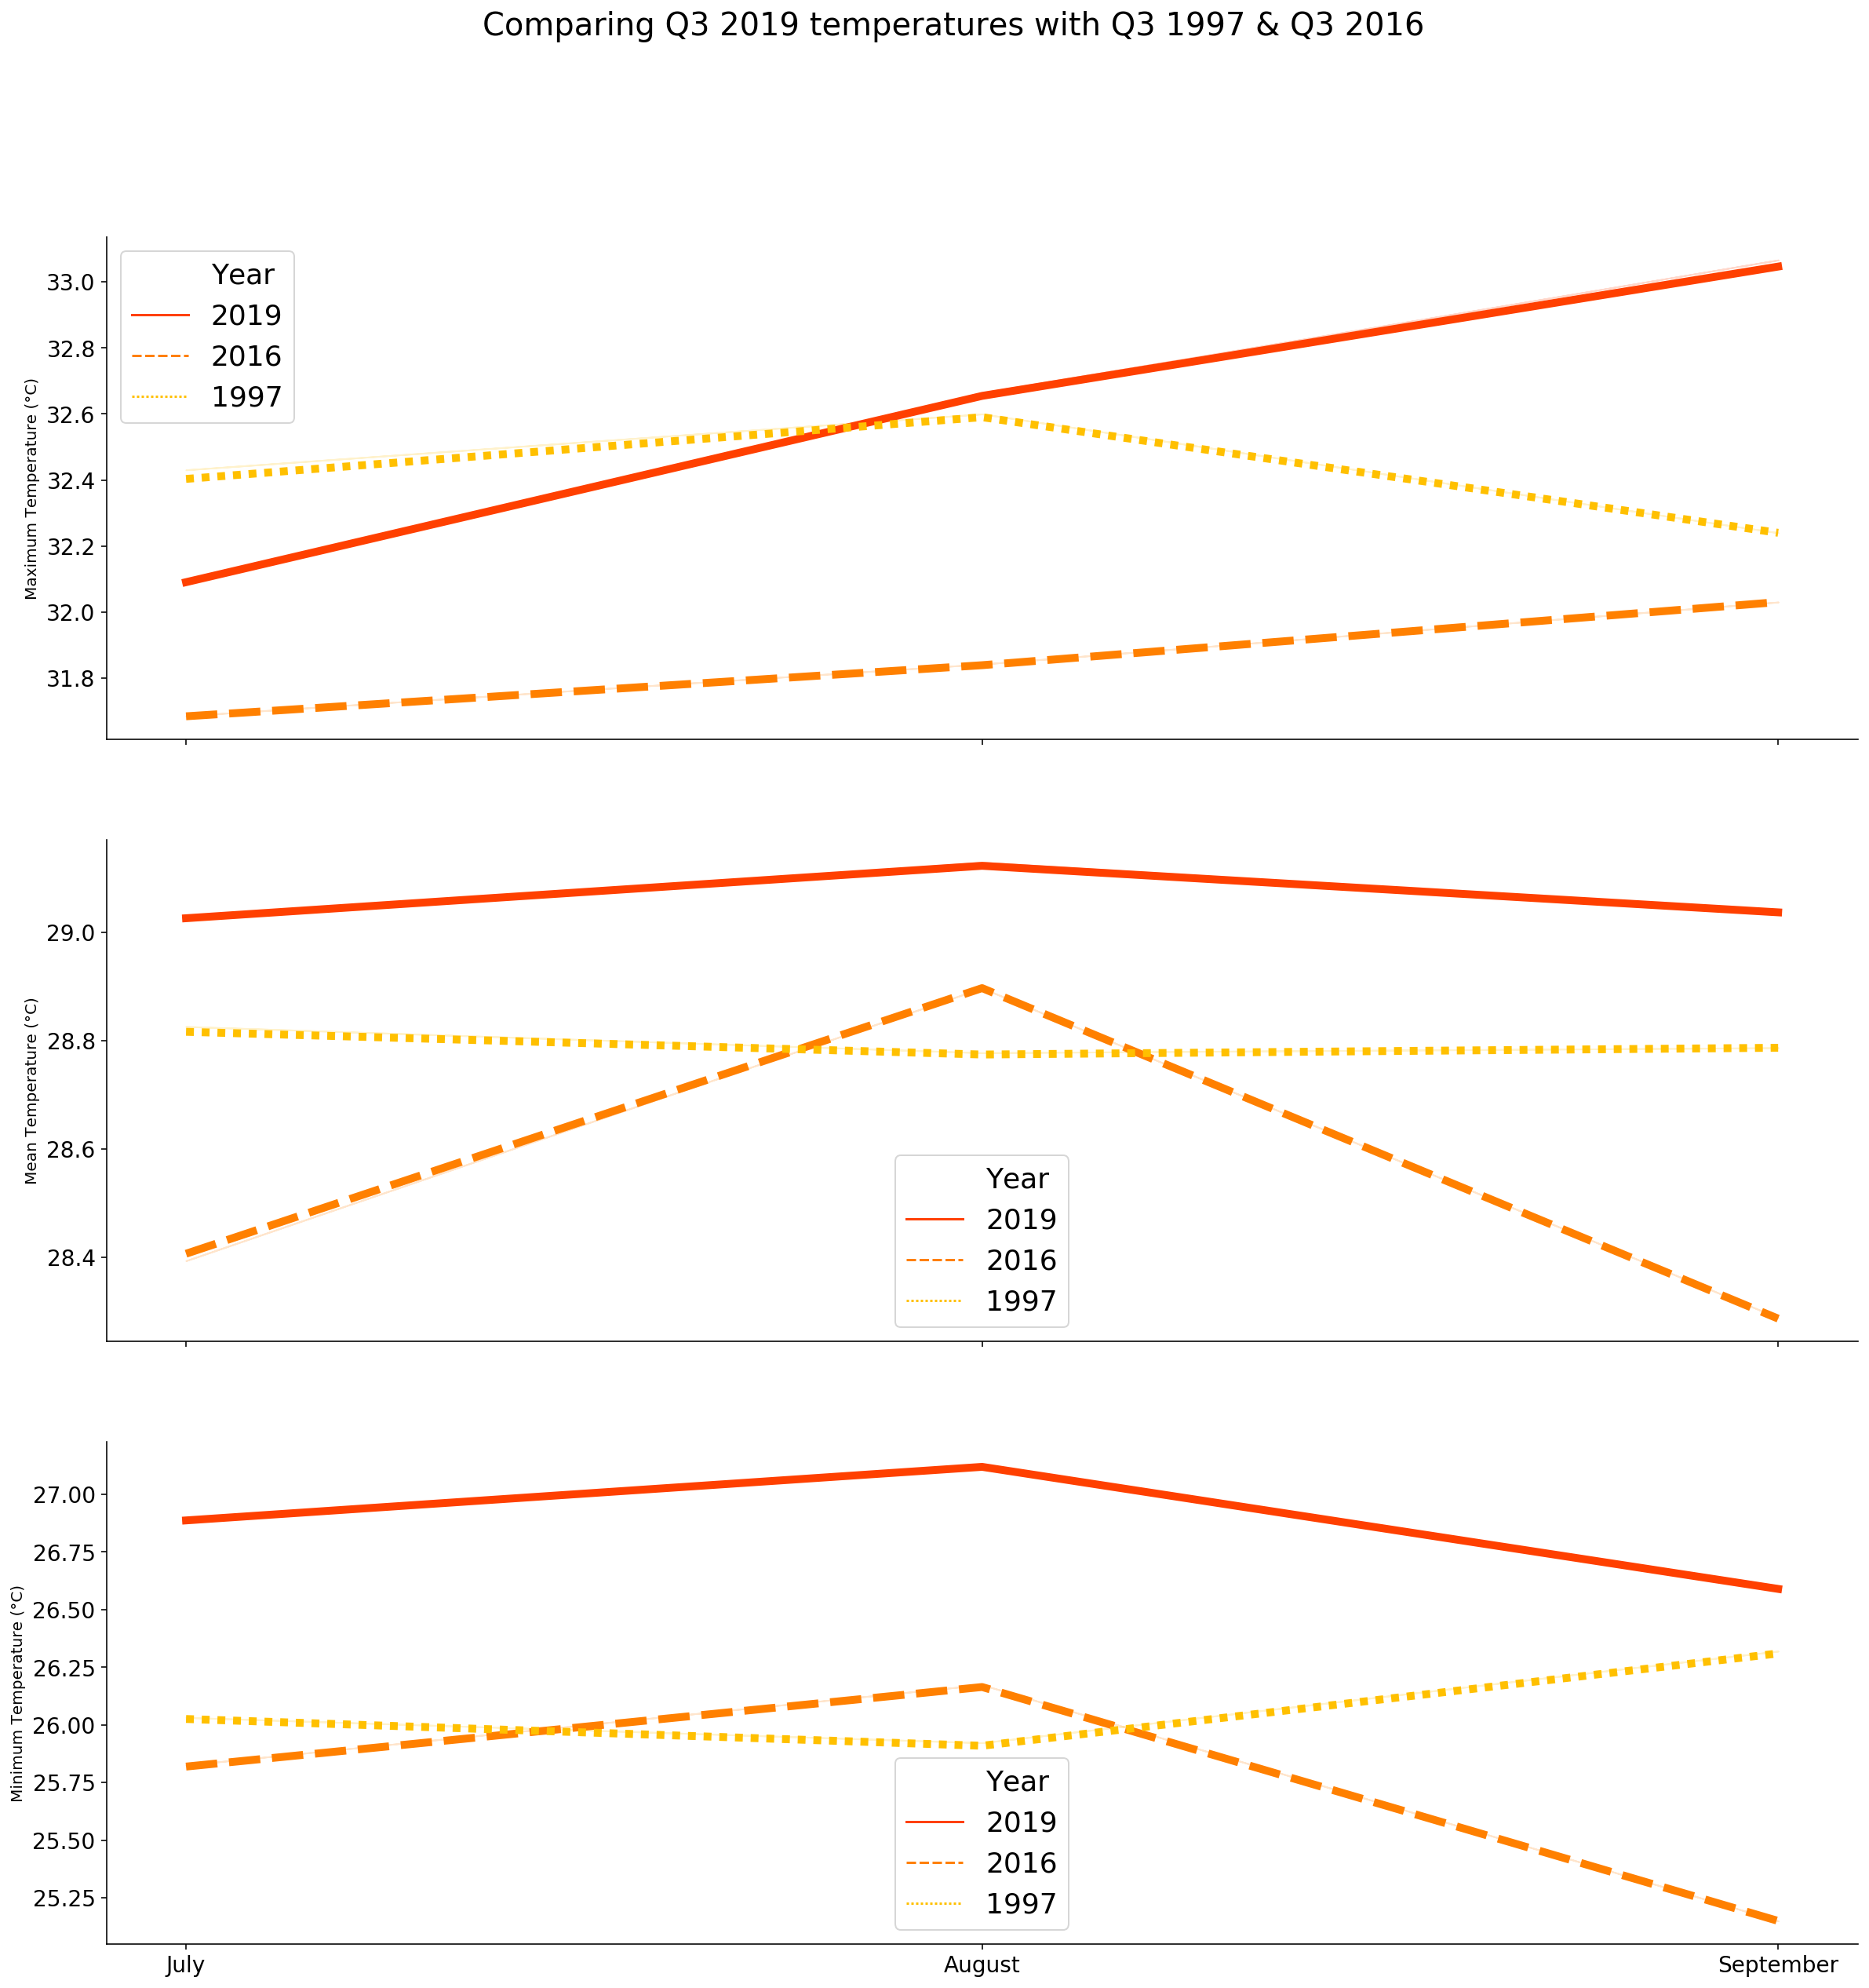

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(20, 20), sharex=True)

sns.lineplot(
    x="Month_Name",
    y="Maximum Temperature (°C)",
    hue = "Year",
    hue_order=[2019, 2016, 1997],
    style = "Year",
    style_order=[2019, 2016, 1997],
    data=q3_combo,
    linewidth=5,
    ci=False,
    sort=False,
    legend="full",
    palette=sns.color_palette("autumn", 3),
    ax=axs[0],
)



sns.lineplot(
    x="Month_Name",
    y="Mean Temperature (°C)",
    hue = "Year",
    hue_order=[2019, 2016, 1997],
    style = "Year",
    style_order=[2019, 2016, 1997],
    data=q3_combo,
    linewidth=5,
    ci=False,
    sort=False,
    legend="full",
    palette=sns.color_palette("autumn", 3),
    ax=axs[1],
)


sns.lineplot(
    x="Month_Name",
    y="Minimum Temperature (°C)",
    hue = "Year",
    hue_order=[2019, 2016, 1997],
    style = "Year",
    style_order=[2019, 2016, 1997],
    data=q3_combo,
    linewidth=5,
    ci=False,
    sort=False,
    legend="full",
    palette=sns.color_palette("autumn", 3),
    ax=axs[2],
)


fig.suptitle("Comparing Q3 2019 temperatures with Q3 1997 & Q3 2016", fontsize=20)

for ax in axs:
    ax.legend(fontsize=18, loc="best")

sns.despine()
plt.xlabel("")
plt.show()

At a glance, it is clear that temperatures in Q3 2019 (represented by the solid red line) were more intense than similar periods in 2016 and 1997.

[2019 is certainly on track to break annual temperature records in Singapore](https://www.straitstimes.com/singapore/environment/2019-poised-to-be-really-hot-year).

## 2.3 JOYPLOTS COMPARING Q3 2019 WITH HISTORIC Q3 WEATHER DATA

Joyplots, or stacked density plots, offer another way of visualising how hot Q3 2019 had been, compared to the same period over the last 36 years.

I'll just plot out one version below for the mean daily temperatures.

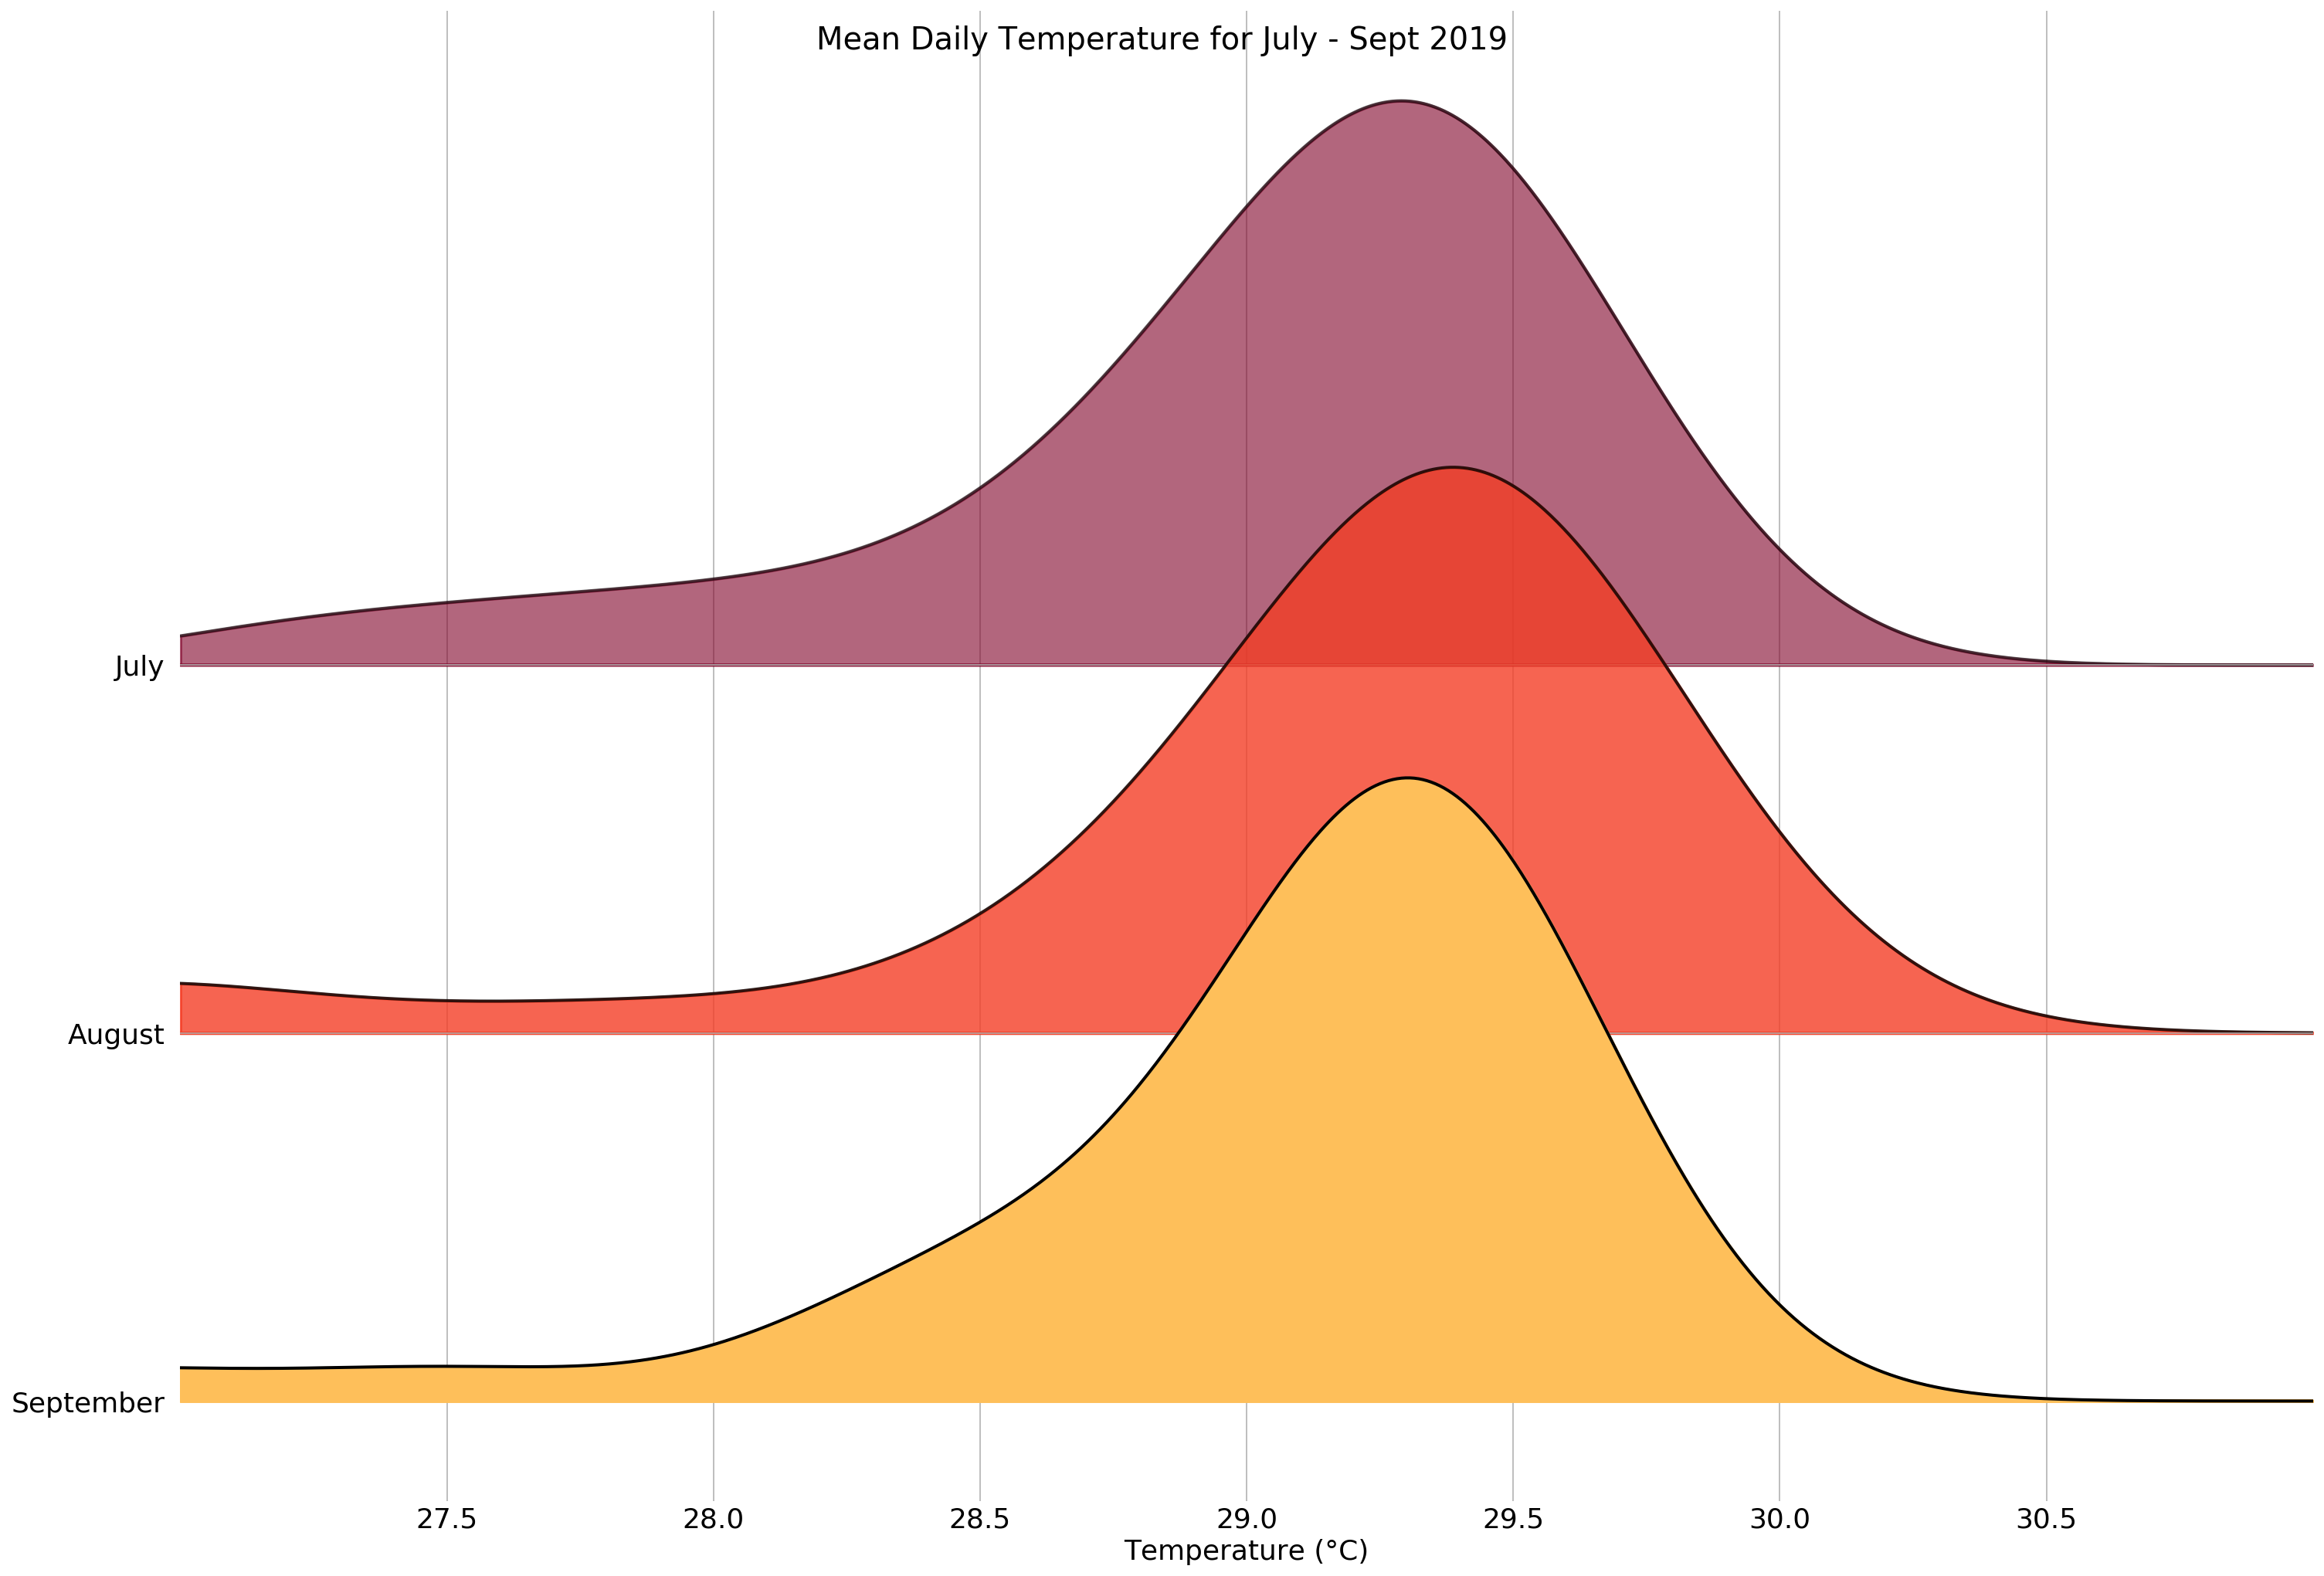

In [19]:
labels = ["July", "August", "September"]
fig, axes = joypy.joyplot(
    weather_q32019,
    by="Month",
    column="Mean Temperature (°C)",
    kind="kde",
    tails=0.2,
    range_style="all",
    x_range=[27, 31],
    overlap=5,
    linewidth=2,
    colormap=cm.YlOrRd_r,
    fade=True,
    legend=False,
    labels=labels,
    ylabelsize=18,
    xlabelsize=18,
    grid="both",
    figsize=(21, 14),
)
fig.suptitle("Mean Daily Temperature for July - Sept 2019", fontsize=20)
plt.xlabel("Temperature (°C)", fontsize=18)
plt.ylabel("")
plt.show()

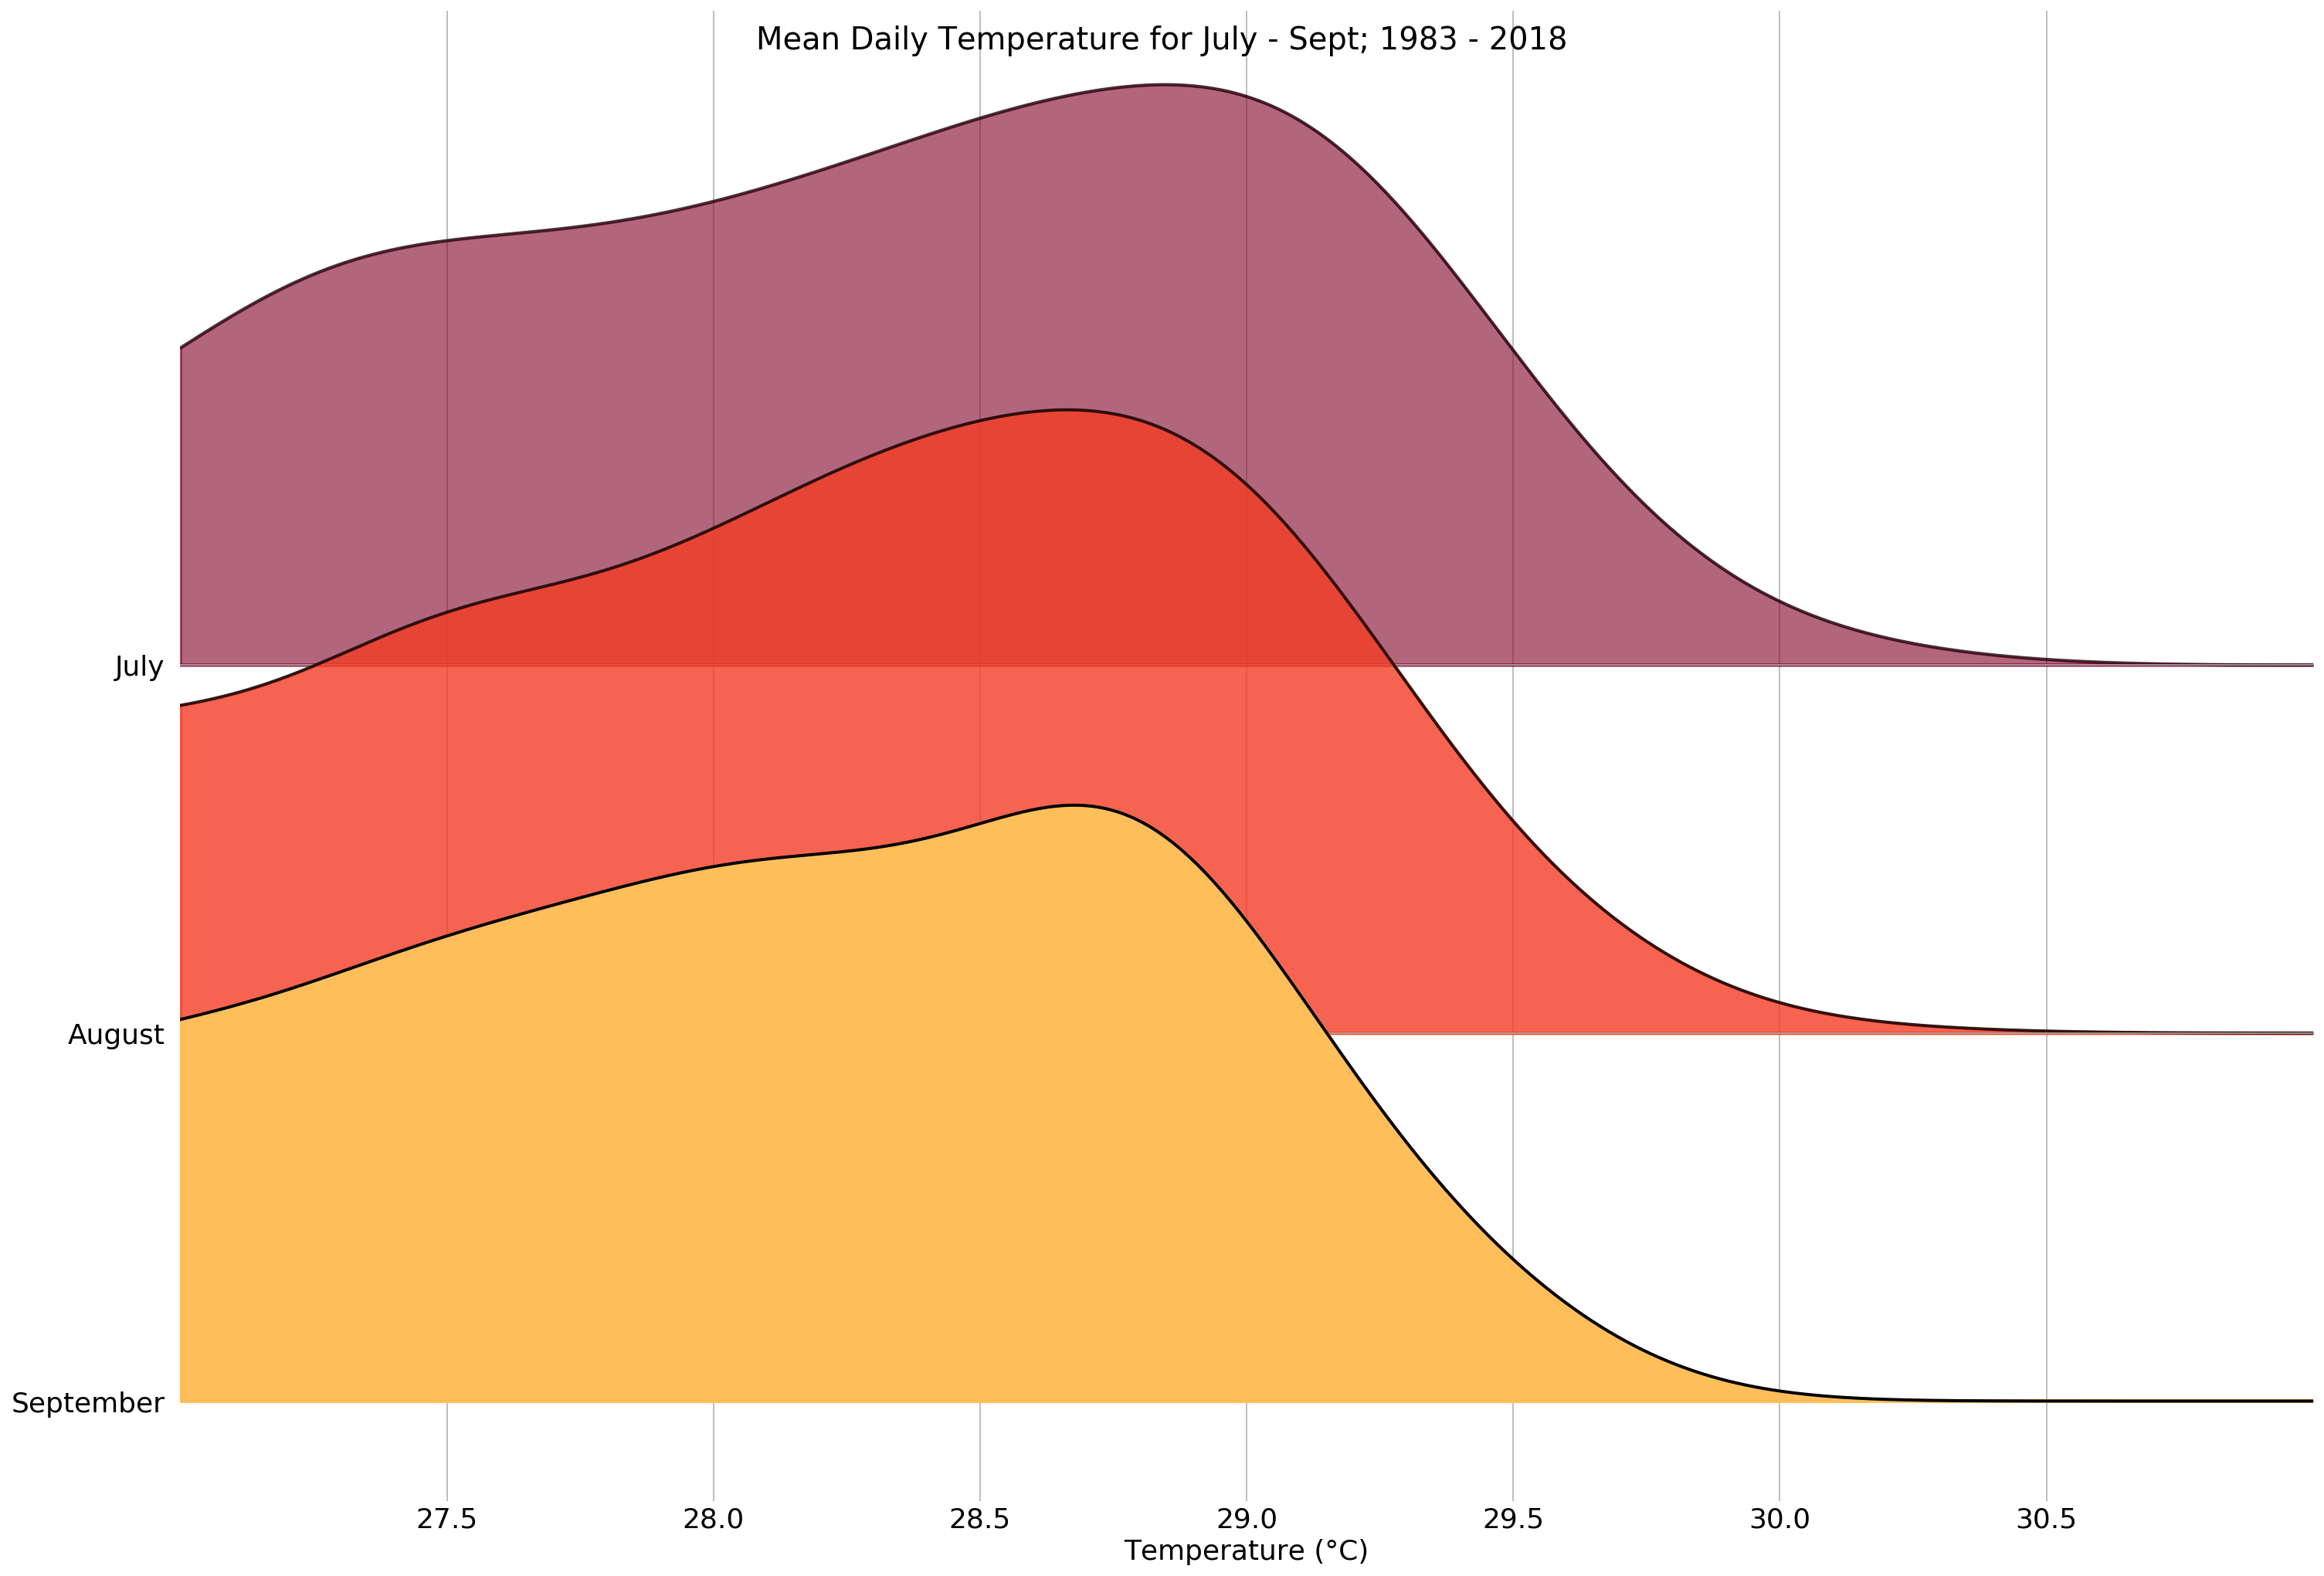

In [20]:
labels = ["July", "August", "September"]
fig, axes = joypy.joyplot(
    historic_q3,
    by="Month",
    column="Mean Temperature (°C)",
    kind="kde",
    tails=0.2,
    range_style="all",
    x_range=[27, 31],
    overlap=5,
    linewidth=2,
    colormap=cm.YlOrRd_r,
    fade=True,
    legend=False,
    labels=labels,
    ylabelsize=18,
    xlabelsize=18,
    grid="both",
    figsize=(21, 14),
)
fig.suptitle("Mean Daily Temperature for July - Sept; 1983 - 2018", fontsize=20)
plt.xlabel("Temperature (°C)", fontsize=18)
plt.ylabel("")
plt.show()

Comparing the two charts, you can see that the distribution of average daily temperatures for Q3 2019 has shifted distinctly to the right, signalling higher temperatures. 

# 3 COMPARING NUMBER OF DAYS WHERE MEAN AND MAXIMUM TEMPERATURES ARE ABOVE HISTORIC AVERAGE

Another way to illustrate how hot Q3 2019 had been vis-a-vis Q3s in other years is to compare the number of days in Q3 2019 where the mercury had soared above the long term mean for Q3s in other years.

The two benchmarks I'll use are:
* 31.39°C: Average maximum daily temperature recorded between July and September in years between 1983 and 2018.


* 27.92°C: Average daily temperature recorded between July and September in years between 1983 and 2018.

In [21]:
crit8 = weather['Maximum Temperature (°C)'] > 31.39
crit9 = weather['Mean Temperature (°C)'] > 27.92

In [22]:
# Filtering for 2 new dataframes
# First is for Q3 weather data where the max daily temperature is above the historic mean of 31.39°C 
weather_q3_maxtemp = weather[crit8 & (crit3 | crit4 | crit5)]

# Second dataframe is for Q3 weather data where the mean daily temperature is above the historic mean of 27.92°C
weather_q3_meantemp = weather[crit9 & (crit3 | crit4 | crit5)]

In [23]:
weather_q3_maxtemp.shape, weather_q3_meantemp.shape

((2102, 12), (1874, 12))

## 3.1 IN Q3 2019, HOW MANY DAYS SAW THE MAXIMUM DAILY TEMPERATURE RISE ABOVE THE LONG TERM MEAN?

Answer: 81. This matched the record reached in 1997, where Singapore felt the full brunt of the El Nino effects.

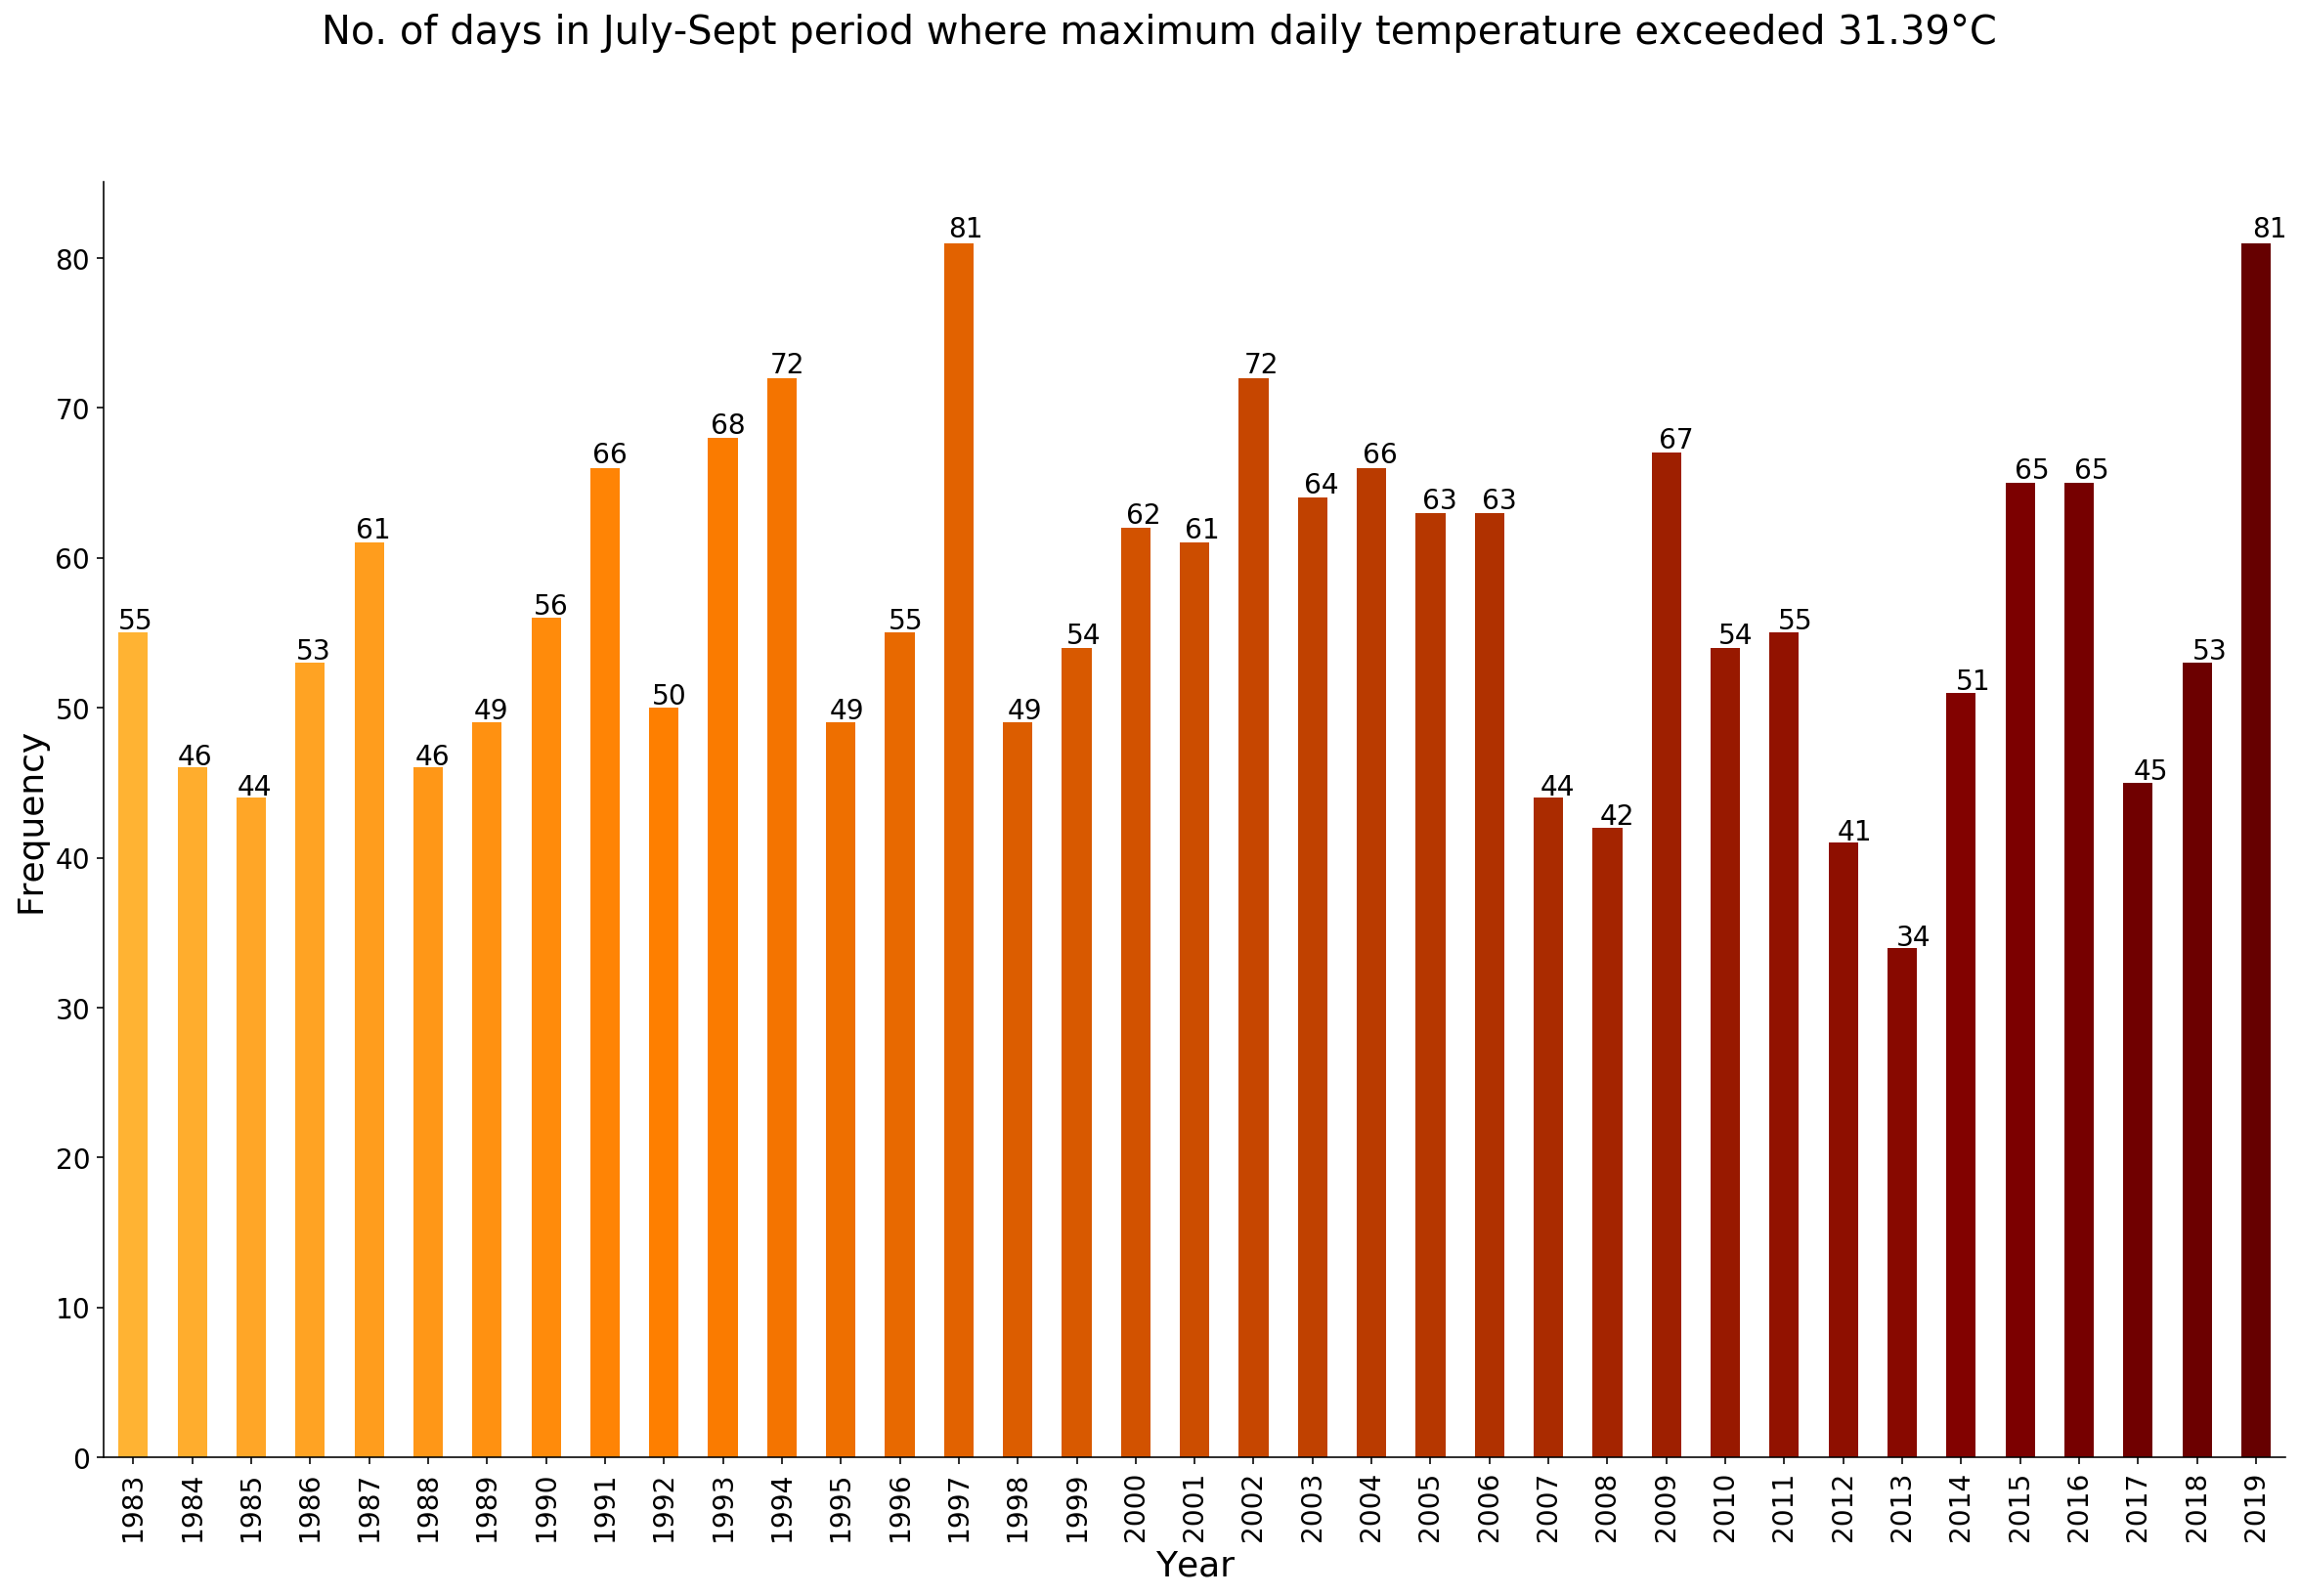

In [24]:
color = cm.afmhot_r(np.linspace(.4,.8, 37))

fig, ax = plt.subplots(figsize=(20, 12))                     
weather_q3_maxtemp['Year'].value_counts().sort_index(ascending=True).plot(kind="bar", color=color)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=14)
    
fig.suptitle("No. of days in July-Sept period where maximum daily temperature exceeded 31.39°C", fontsize=20)

plt.xlabel("Year", fontsize=18)
plt.ylabel("Frequency", fontsize=18)

sns.despine()
plt.show()


## 2.3.2 IN Q3 2019, HOW MANY DAYS WERE THE MEAN DAILY TEMPERATURE ABOVE THE LONG TERM MEAN?

Answer: 84, a new record, beating the last record set in the El Nino year of 1997.

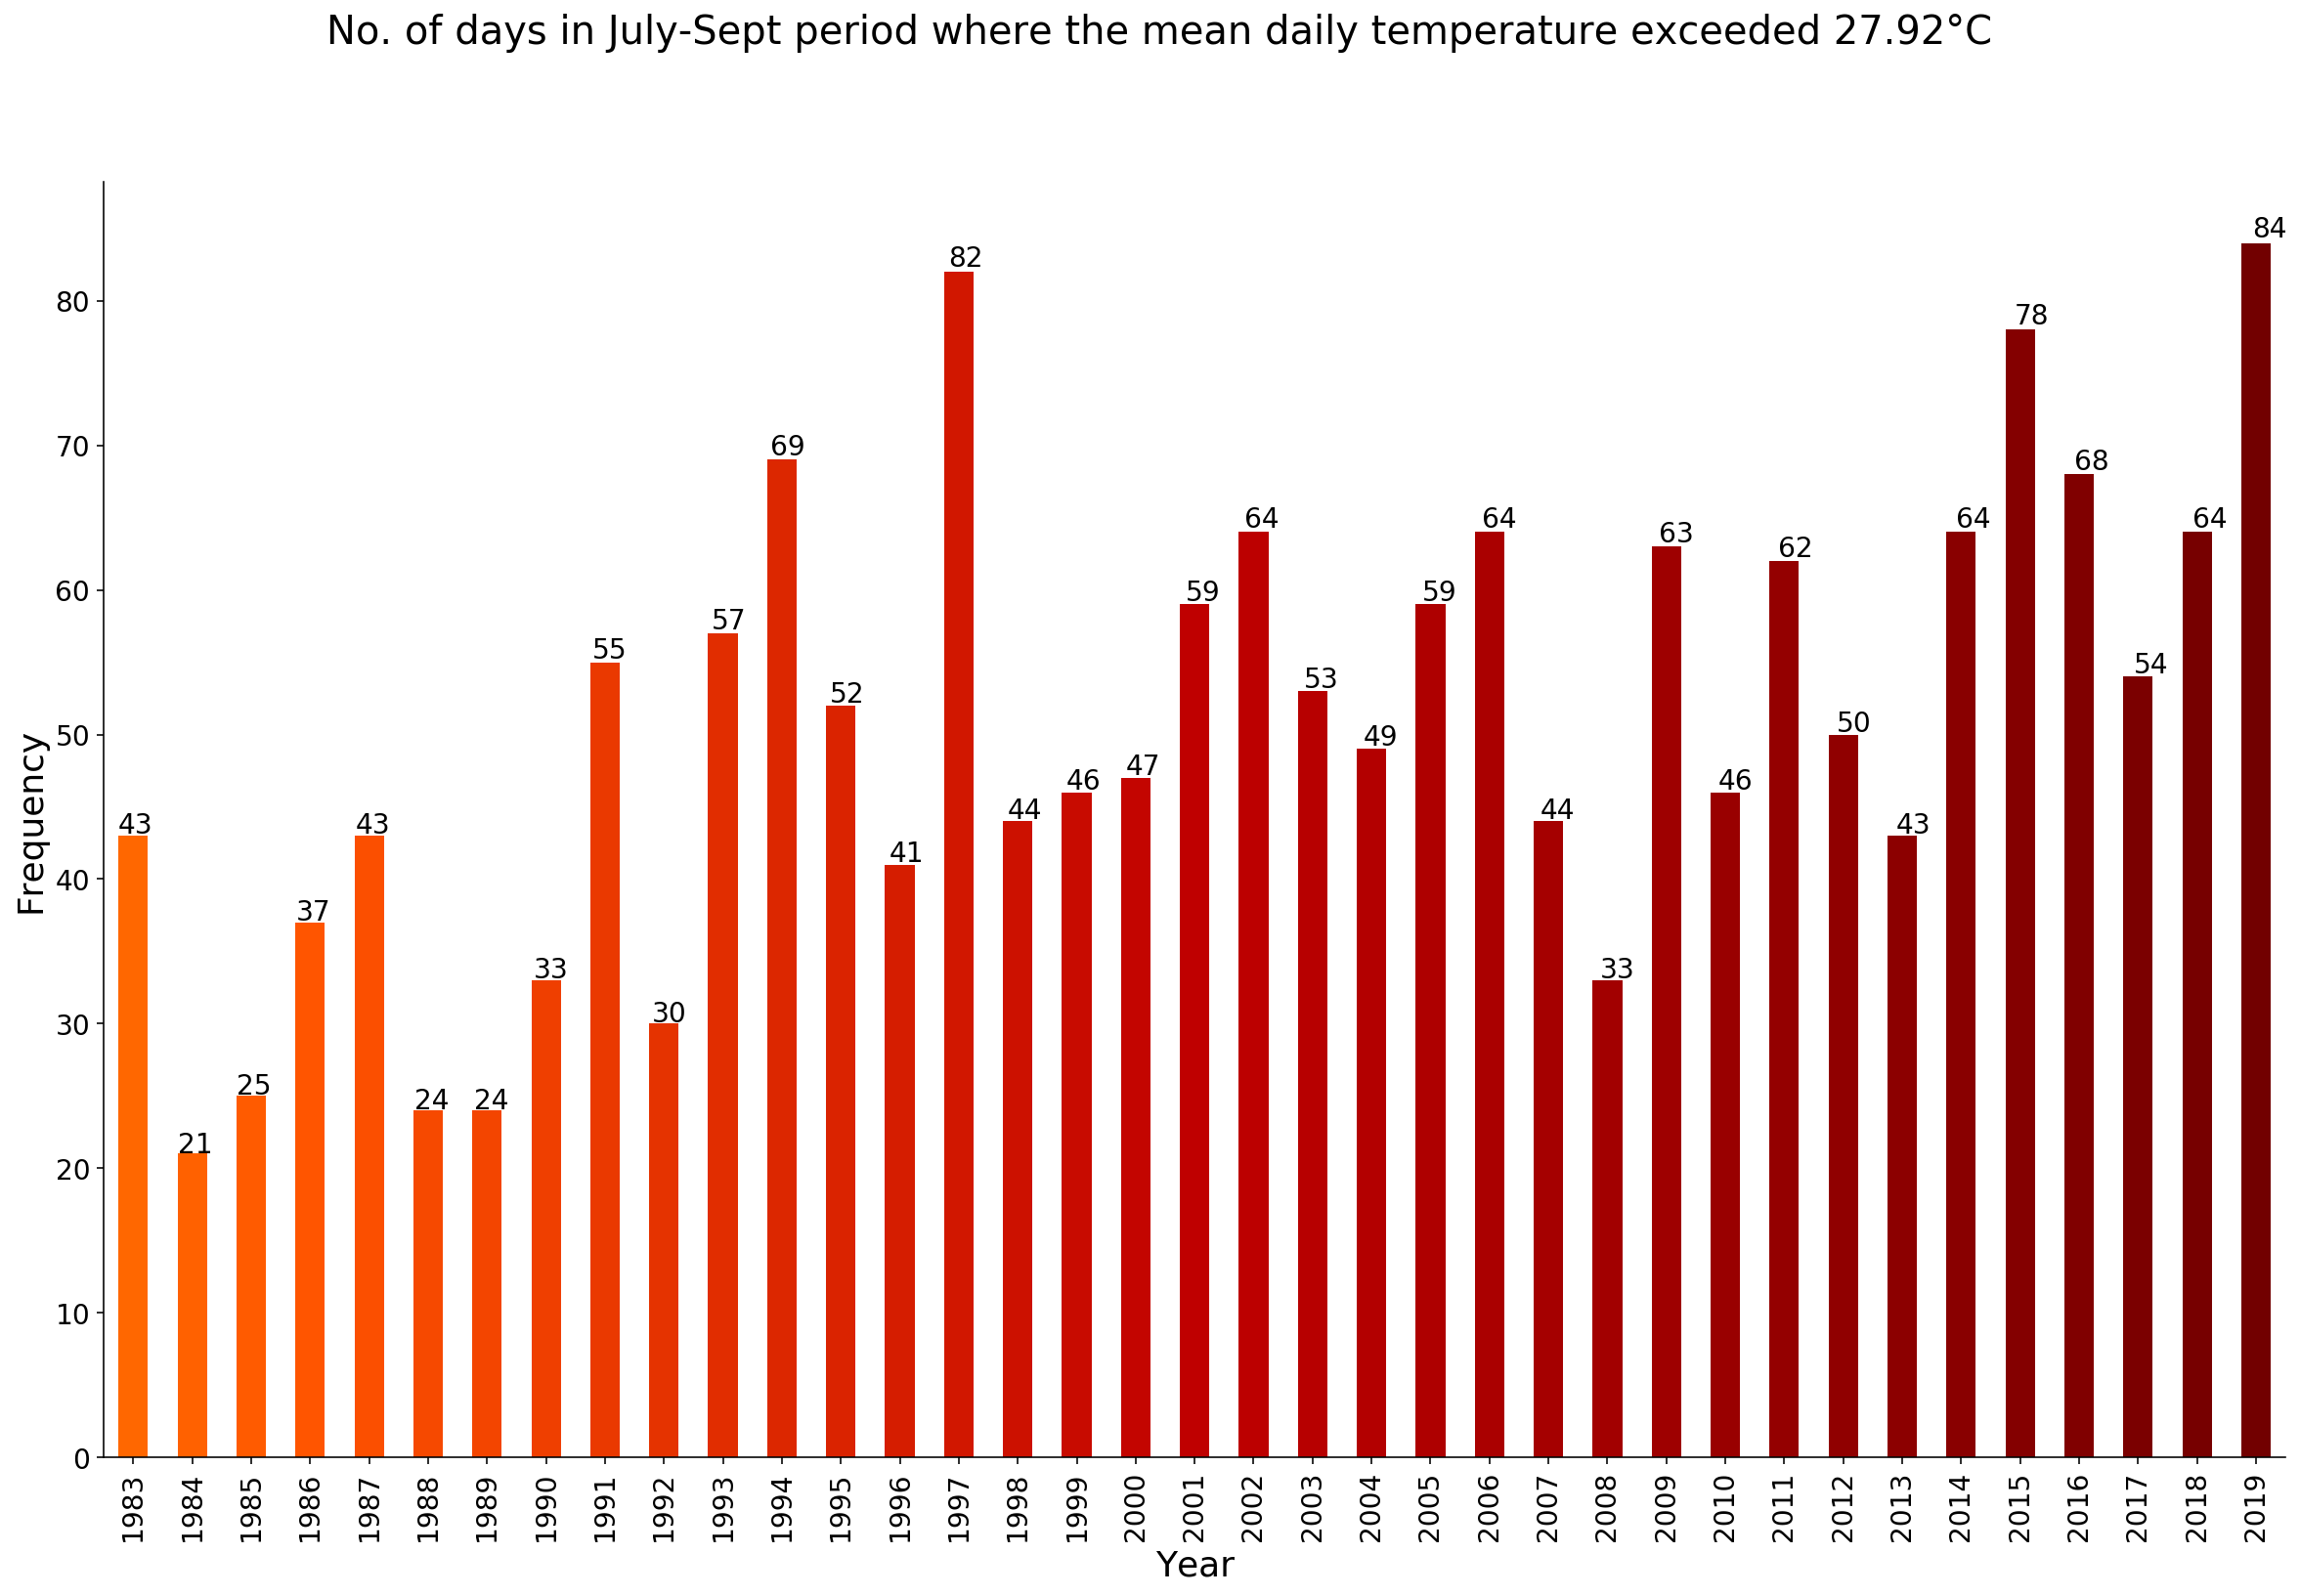

In [25]:
color = cm.gist_heat_r(np.linspace(.3,.7, 37)) 

fig, ax = plt.subplots(figsize=(20, 12))
weather_q3_meantemp['Year'].value_counts().sort_index(ascending=True).plot(kind="bar", color=color)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=14)
    
fig.suptitle("No. of days in July-Sept period where the mean daily temperature exceeded 27.92°C", fontsize=20)

plt.xlabel("Year", fontsize=18)
plt.ylabel("Frequency", fontsize=18)

sns.despine()
plt.show()

# 4. IS Q3 2019 THE WARMEST Q3 OR QUARTER ON RECORD?

Without the full set of data - Singapore's written temperature records go back to 1929 - it is hard to say definitively. Much also depends on the benchmarks and timeframe you adopt for comparison.

I am not a meteorologist or an expert on Singapore's weather, so I can't say if the benchmarks and assumptions I have used here are "correct".

But Q3 2019 is certainly one of the warmest three-month period we've seen in the last 36 years in Singapore.